In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

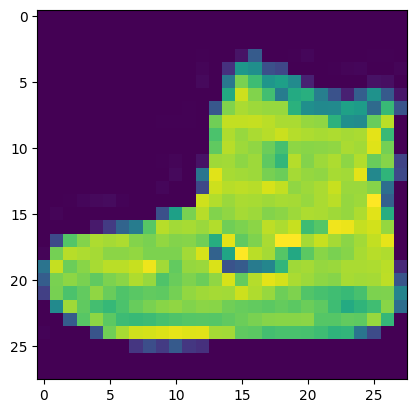

In [10]:
plt.imshow(x_train[0])

In [11]:
print(y_train[0])

9


In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
x_train = x_train.astype(float) /255.0
x_test = x_test.astype(float) /255.0

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer ,Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 10)         

In [26]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [27]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [29]:
history = model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 25s 197ms/step - loss: 1.5723 - acc: 0.4627 - val_loss: 0.9035 - val_acc: 0.6687
Epoch 2/30
118/118 [==============================] - 19s 159ms/step - loss: 0.7799 - acc: 0.7089 - val_loss: 0.7254 - val_acc: 0.7238
Epoch 3/30
118/118 [==============================] - 21s 182ms/step - loss: 0.6744 - acc: 0.7465 - val_loss: 0.6729 - val_acc: 0.7549
Epoch 4/30
118/118 [==============================] - 19s 160ms/step - loss: 0.6239 - acc: 0.7665 - val_loss: 0.6231 - val_acc: 0.7688
Epoch 5/30
118/118 [==============================] - 20s 166ms/step - loss: 0.5937 - acc: 0.7798 - val_loss: 0.6101 - val_acc: 0.7730
Epoch 6/30
118/118 [==============================] - 22s 185ms/step - loss: 0.5720 - acc: 0.7881 - val_loss: 0.5917 - val_acc: 0.7840
Epoch 7/30
118/118 [==============================] - 24s 207ms/step - loss: 0.5536 - acc: 0.7965 - val_loss: 0.5746 - val_acc: 0.7877
Epoch 8/30
118/118 [==============================] - 1

In [30]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

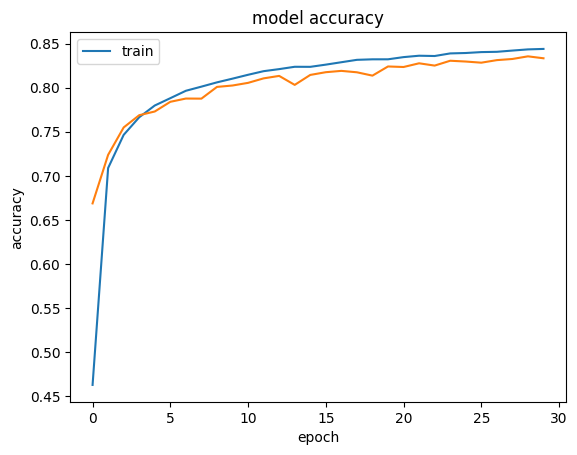

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()